# Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights


Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

## Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

- 1. Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

- 2.Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/Users/admin/Desktop/IRONHACK/5.WEEK/LABS/amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.shape

(2443651, 9)

In [5]:
# Displaying the data types of each column in the dataframe
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [6]:
# Retrieving the unique data types present in the dataframe columns
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O'), dtype('bool')]

In [7]:
# Extracting column names with numerical data types from the dataframe
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [8]:
# Counting and sorting the unique values for each numerical column in descending order
df.select_dtypes("number").nunique().sort_values(ascending=True) #puede ser false tambien

boughtInLastMonth         25
stars                     42
reviews                19446
price                  82916
uid                  2443651
dtype: int64

- `Frequency Tables`:
Generate a frequency table for the product category. Which are the top 5 most listed product categories?

In [9]:
# Retrieving column names with object (typically string) data types from the dataframe
df.select_dtypes("object").columns

Index(['asin', 'title', 'category'], dtype='object')

In [10]:
# Counting and sorting the unique values for each object (string) column in descending order
df.select_dtypes("object").nunique().sort_values(ascending=True)

category        296
title       2077591
asin        2222742
dtype: int64

In [11]:
# Frequency table for 'MSZoning'
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [12]:
top_5_categories = frequency_table.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

- 2.`Visualizations`:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories. For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

<Axes: xlabel='category'>

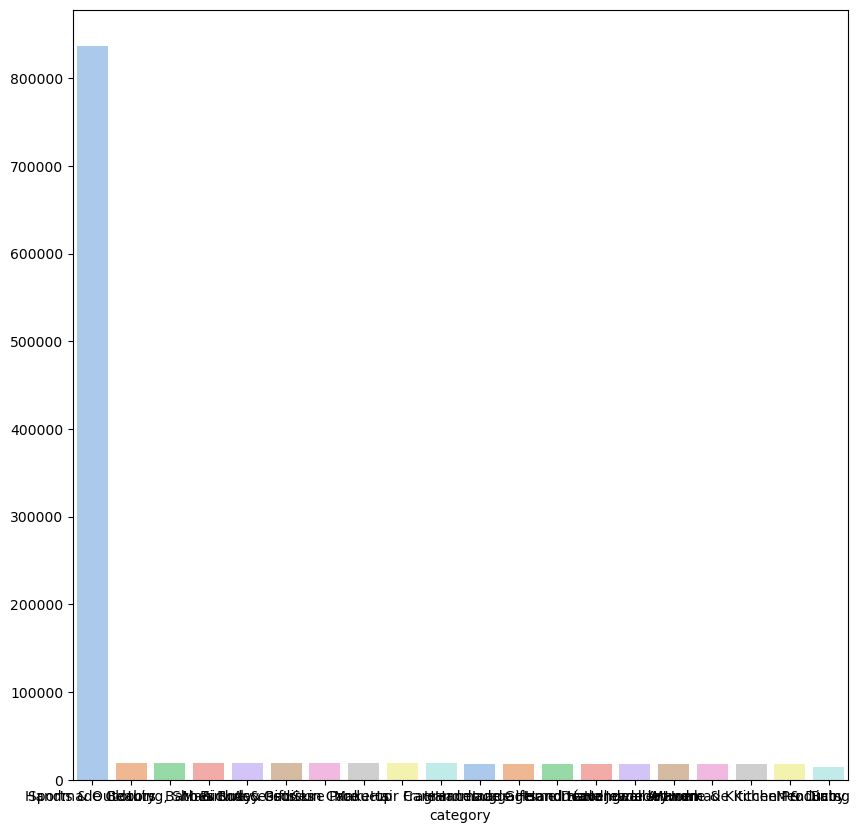

In [13]:
# Contar los valores únicos de la columna 'category' y seleccionar las 20 categorías más frecuentes
plt.figure(figsize=(10,10))
sns.barplot(x=df['category'].value_counts().head(20).index, y=df['category'].value_counts().head(20).values, palette="pastel")

<Axes: xlabel='category', ylabel='count'>

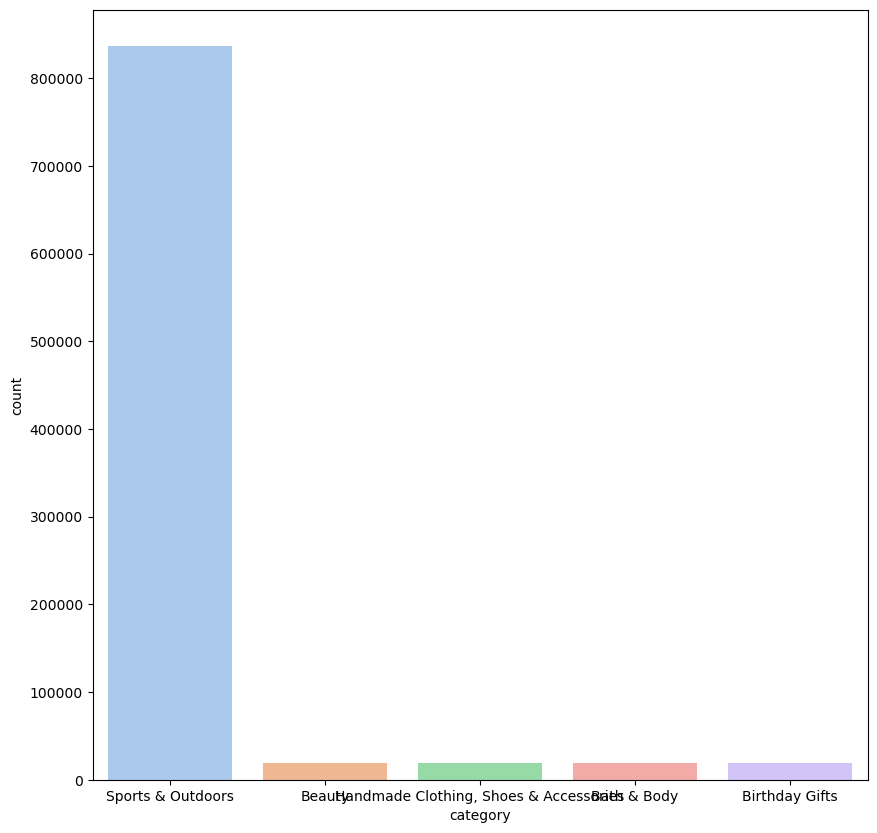

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x=top_5_categories.index, y=top_5_categories, palette="pastel")

([<matplotlib.patches.Wedge at 0x15e810650>,
 [Text(-0.28666771368868316, -1.0619894641325325, 'Sports & Outdoors'),
  Text(0.4891716928879617, 0.985246697470804, 'Beauty'),
  Text(0.3545789173188807, 1.0412846831644893, 'Handmade Clothing, Shoes & Accessories'),
  Text(0.21457431617737968, 1.0788687885174035, 'Bath & Body'),
  Text(0.0717914226731242, 1.0976547688734235, 'Birthday Gifts')],
 [Text(-0.1563642074665544, -0.5792669804359267, '91.6%'),
  Text(0.2668209233934336, 0.5374072895295293, '2.1%'),
  Text(0.1934066821739349, 0.5679734635442668, '2.1%'),
  Text(0.11704053609675254, 0.5884738846458565, '2.1%'),
  Text(0.0391589578217041, 0.5987207830218674, '2.1%')])

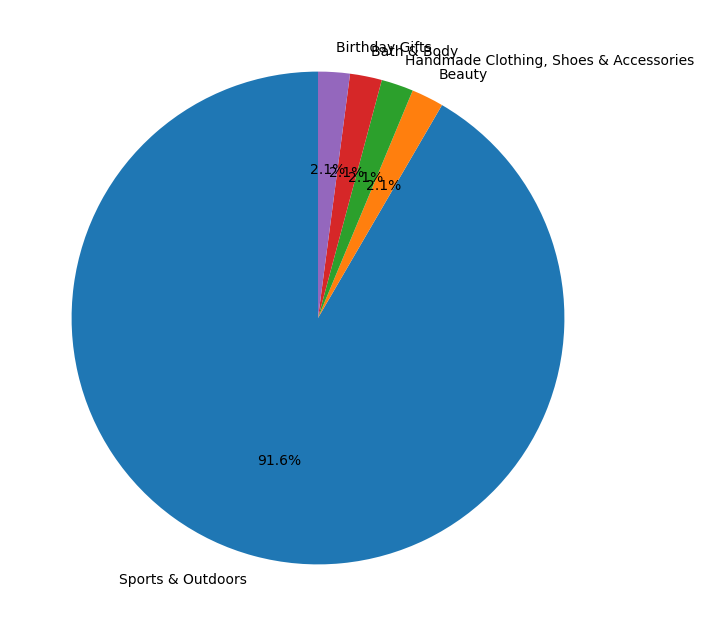

In [15]:
plt.figure(figsize=(8,8))
plt.pie(top_5_categories, labels=top_5_categories.index, autopct='%1.1f%%', startangle=90)

## Part 2: Delving into Product Pricing

- Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

**1. Measures of Centrality:**

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

**2. Measures of Dispersion:**

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

**3. Visualizations:**

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

**1. Measures of Centrality:**

Calculate the mean, median, and mode for the price of products. What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [16]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()

print(f"Mean price: {mean_price}")
print(f"Median price: {median_price}")
print(f"Mode price: {mode_price}")

Mean price: 89.24380943923663
Median price: 19.09
Mode price: 0    9.99
Name: price, dtype: float64


- The mean price point of products listed is $89.24. 
- The average price (mean) is significantly higher than the most common price (mode), suggesting the presence of some high value products that are influencing the average.

**2. Measures of Dispersion:**

Determine the variance, standard deviation, range, and interquartile range for product price. How varied are the product prices? Are there any indicators of a significant spread in prices?

In [17]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

print(f"Variance of price: {variance_price}")
print(f"Standard deviation of price: {std_dev_price}")
print(f"Minimum price: {min_price}")
print(f"Maximum price: {max_price}")
print(f"Range of price: {range_price}")
print(f"Quantiles of price (25%, 50%, 75%): {quantiles_price}")

Variance of price: 119445.48532256528
Standard deviation of price: 345.60886175352226
Minimum price: 0.0
Maximum price: 100000.0
Range of price: 100000.0
Quantiles of price (25%, 50%, 75%): 0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


In [18]:
df['price'].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

The variance, a measure of how far each price in the set is from the mean ($89,24), is approximately (119445.48). 
The variance of prices is high, indicating a significant spread in prices, confirmed by the large standard deviation. Additionally, the wide range from the minimum to the maximum price suggests that there is considerable variation in product pricing

**3. Visualizations:**

- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved. 
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

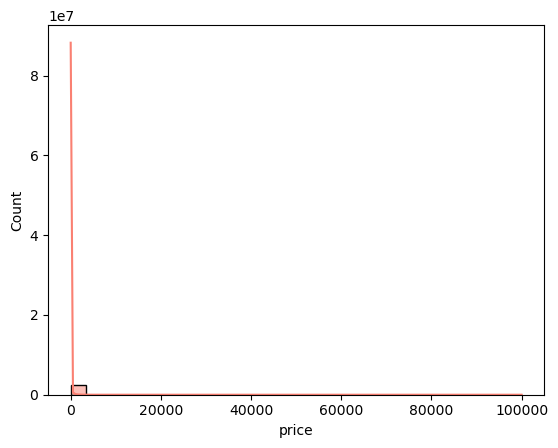

In [19]:
sns.histplot(df['price'], kde=True, bins=30, color="salmon")

<Axes: >

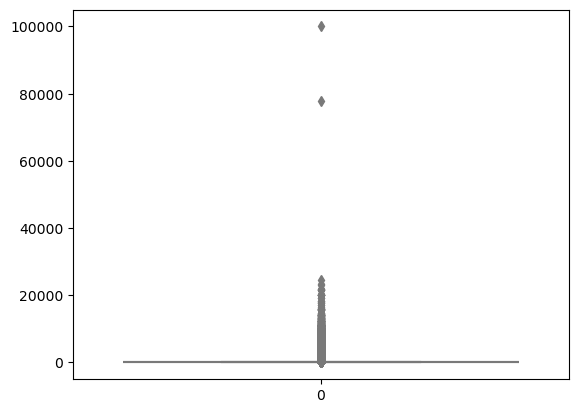

In [20]:
sns.boxplot(data = df['price'], color="lightblue")

Data cannot be analyzed well because there are too many outliers

## Part 3: Unpacking Product Ratings

- Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

**1.Measures of Centrality:**

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

**2. Measures of Dispersion:**

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

**3. Shape of the Distribution:**

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

**4. Visualizations:**

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

**1. Measures of Centrality:**

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

In [21]:
mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()

print(f"Mean stars: {mean_stars}")
print(f"Median stars: {median_stars}")
print(f"Mode stars: {mode_stars}")

Mean stars: 2.152836472966065
Median stars: 0.0
Mode stars: 0    0.0
Name: stars, dtype: float64


- How do customers generally rate products? Is there a common trend?

Customer trends to rate products when they are upset. The mean (average) rating of 2.15 indicates that, on average, customers are giving products relatively low ratings. 

**2. Measures of Dispersion:**

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [22]:
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std() #con respecto a la media cuanto se alejo
min_stars = df['stars'].min()
max_stars = df['stars'].max()
range_stars = max_stars - min_stars
quantiles_stars = df['stars'].quantile([0.25, 0.5, 0.75])

print(f"Variance of stars: {variance_stars}")
print(f"Standard deviation of stars: {std_dev_stars}")
print(f"Minimum stars: {min_price}")
print(f"Maximum stars: {max_price}")
print(f"Range of stars: {range_price}")
print(f"Quantiles of stars (25%, 50%, 75%): {quantiles_stars}")

Variance of stars: 4.81743402976196
Standard deviation of stars: 2.1948653785054697
Minimum stars: 0.0
Maximum stars: 100000.0
Range of stars: 100000.0
Quantiles of stars (25%, 50%, 75%): 0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


In [23]:
df['stars'].describe().round(2)

count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

**3. Shape of the Distribution:**

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [24]:
skewness = df['stars'].skew()
kurtosis = df['stars'].kurtosis()

skewness, kurtosis

(0.08120735761080985, -1.9260061280432985)

This suggests that the ratings tend to be spread out rather than concentrated around a central value, and there may be fewer extreme values compared to a normal distribution.

**3. Shape of the Distribution:**

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

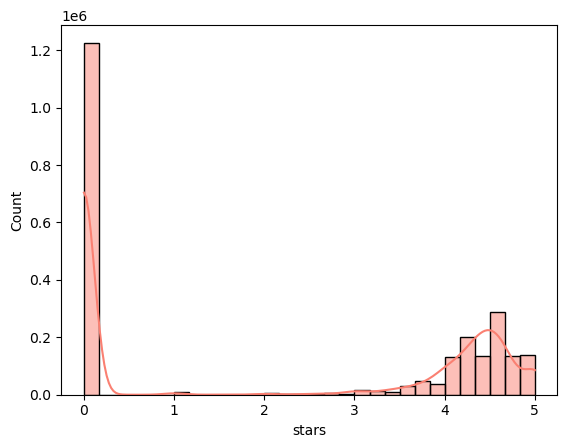

In [25]:
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")

The ratings do not have a normal distribution, they are skewed towards lower values with a noticeable concentration at 0 and less frequently at higher values, especially between 4 and 5.